<b> Titanic Kaggle Competition </b> 

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
# importing packages 
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import sklearn

In [2]:
# Reading the training dataset 
train = pd.read_csv('train.csv')

In [3]:
# Reading the test dataset
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train.shape)
train.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print(test.shape)
test.info()

(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<b> Update missing values </b>
- Missing values exist in both test and training data set. 
- Specifically Age, Cabin and Embarked have missing values in the training data set
- And Age, Fare and Cabin are missing in the test data set

In [7]:
# Updating Age using the median value 

# combining the two data sets 
train['DataSet'] = 'Training'
test['DataSet'] = 'Test'

df_all = pd.concat([train, test], sort=True).reset_index(drop=True)

df_corr = df_all.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_corr[df_corr['level_0']=='Age']

,level_0,level_1,0
6,Age,Age,1.000000
9,Age,Pclass,0.408106
17,Age,SibSp,0.243699
22,Age,Fare,0.178740
25,Age,Parch,0.150917
29,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In [8]:
# Based on correlation, we use Pclass and Sex to find the median values to fill in. 
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [9]:
# Fare is usually based on family size and class. Filling it with median value of Lower Class and family size 0 
df_all['Fare'] = df_all.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].apply(lambda x: x.fillna(x.median()))

In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   DataSet      1309 non-null   object 
 3   Embarked     1307 non-null   object 
 4   Fare         1309 non-null   float64
 5   Name         1309 non-null   object 
 6   Parch        1309 non-null   int64  
 7   PassengerId  1309 non-null   int64  
 8   Pclass       1309 non-null   int64  
 9   Sex          1309 non-null   object 
 10  SibSp        1309 non-null   int64  
 11  Survived     891 non-null    float64
 12  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [11]:
# split the data sets back
train = df_all.loc[df_all['DataSet']=='Training', :].copy()
test = df_all.loc[df_all['DataSet']=='Test', :].copy()
test.drop('Survived', axis=1, inplace=True)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   DataSet      891 non-null    object 
 3   Embarked     889 non-null    object 
 4   Fare         891 non-null    float64
 5   Name         891 non-null    object 
 6   Parch        891 non-null    int64  
 7   PassengerId  891 non-null    int64  
 8   Pclass       891 non-null    int64  
 9   Sex          891 non-null    object 
 10  SibSp        891 non-null    int64  
 11  Survived     891 non-null    float64
 12  Ticket       891 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 97.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age  

In [12]:
# Updating missing embarked values 
train.loc[pd.isnull(train['Embarked']), :]

,Age,Cabin,DataSet,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,Training,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,Training,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [13]:
# Based on the internet Mrs George Nelson Stone embarked from Southhampton 
train['Embarked'] = train['Embarked'].fillna('S')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   DataSet      891 non-null    object 
 3   Embarked     891 non-null    object 
 4   Fare         891 non-null    float64
 5   Name         891 non-null    object 
 6   Parch        891 non-null    int64  
 7   PassengerId  891 non-null    int64  
 8   Pclass       891 non-null    int64  
 9   Sex          891 non-null    object 
 10  SibSp        891 non-null    int64  
 11  Survived     891 non-null    float64
 12  Ticket       891 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 97.5+ KB


In [15]:
# Update Cabin to be filled with M (Missing)
train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [16]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        891 non-null    object 
 2   DataSet      891 non-null    object 
 3   Embarked     891 non-null    object 
 4   Fare         891 non-null    float64
 5   Name         891 non-null    object 
 6   Parch        891 non-null    int64  
 7   PassengerId  891 non-null    int64  
 8   Pclass       891 non-null    int64  
 9   Sex          891 non-null    object 
 10  SibSp        891 non-null    int64  
 11  Survived     891 non-null    float64
 12  Ticket       891 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 97.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age  

<b> Exploratory Analysis </b>

In [17]:
cat_cols = ['Pclass', 'Sex', 'Embarked']
num_cols= ['Age', 'Fare', 'SibSp', 'Parch']

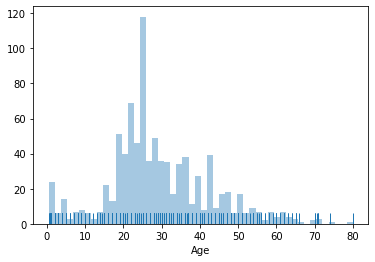

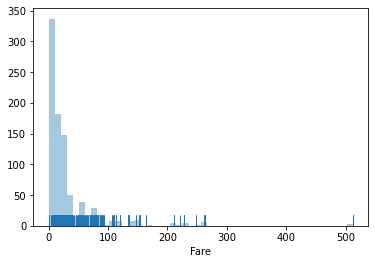

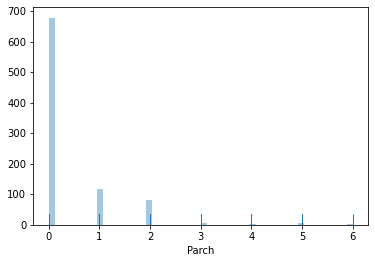

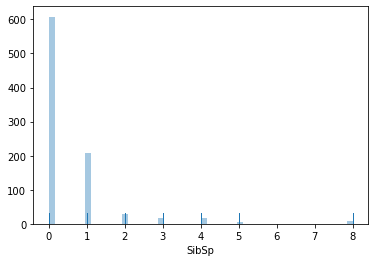

In [18]:
for i, col in enumerate(train.columns):
    if col in num_cols:
        plt.figure(i)
        sns.distplot(train[col], kde=False, rug=True, bins=50)

In [19]:
for col in train.columns.values:
    if col in cat_cols:
        print(train[col].value_counts(normalize=True).round(decimals=4))
        print('\n')

S    0.7250
C    0.1886
Q    0.0864
Name: Embarked, dtype: float64


3    0.5511
1    0.2424
2    0.2065
Name: Pclass, dtype: float64


male      0.6476
female    0.3524
Name: Sex, dtype: float64




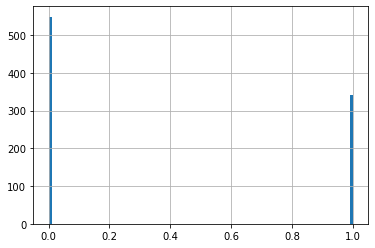

In [20]:
train['Survived'].hist(bins=100)

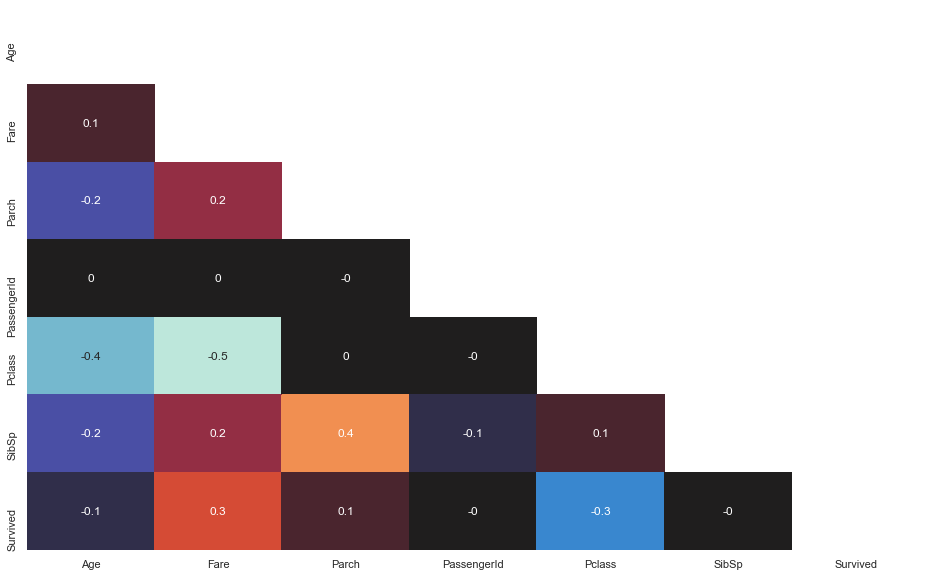

In [21]:
sns.set(rc={'figure.figsize': (16,10)})
corr = train.corr()
corr = corr.round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask,
               xticklabels=corr.columns.values, yticklabels=corr.columns.values,
               center=0, cbar=False, annot=True)

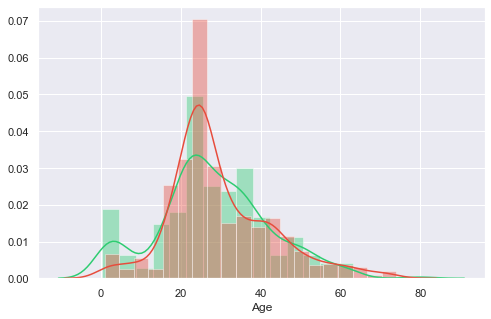

In [22]:
# Measuring relationship between Age and Survived

fig, axs = plt.subplots(figsize=(8,5))

sns.distplot(train[train['Survived']==1]['Age'], label='Survived', hist=True, color='#2ecc71', ax=axs)
sns.distplot(train[train['Survived']==0]['Age'], label='Not Survived', hist=True, color='#e74c3c', ax=axs)


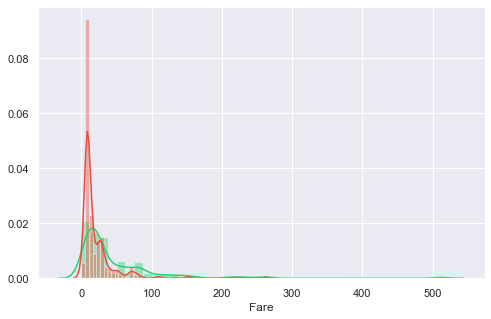

In [23]:
# Measuring relationship between Fare and Survived

fig, axs = plt.subplots(figsize=(8,5))

sns.distplot(train[train['Survived']==1]['Fare'], label='Survived', hist=True, color='#2ecc71', ax=axs)
sns.distplot(train[train['Survived']==0]['Fare'], label='Not Survived', hist=True, color='#e74c3c', ax=axs)

Fare data is highly skewed with few really high outliers

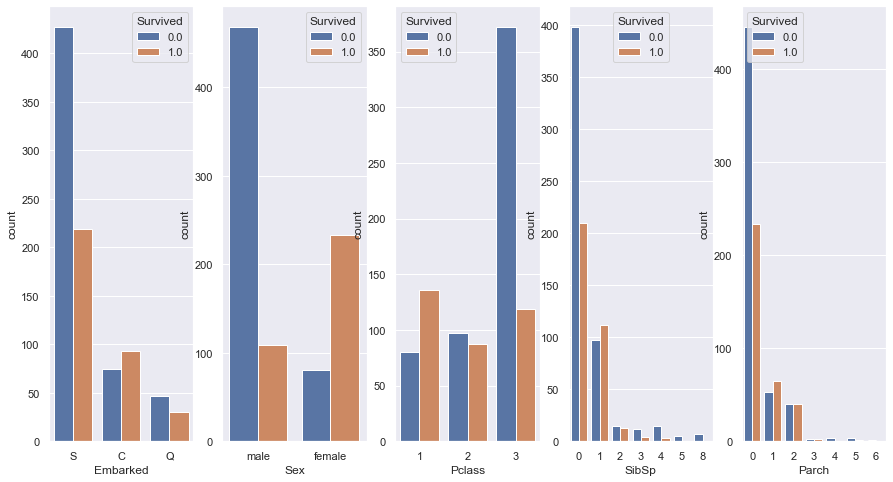

In [24]:
# Comparing categorical variables with Survival rate 
columns = ['Embarked', 'Sex', 'Pclass', 'SibSp', 'Parch']
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15,8))

for i, col in enumerate(columns, 1):
    plt.subplot(1,5,i)
    sns.countplot(x=col, data=train, hue='Survived')
        

In [25]:
cabin = train[['Cabin', 'Survived']].copy()
cabin['Cabin'] = cabin['Cabin'].map(lambda x: x[0])
cabin['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [26]:
cabin = test['Cabin'].copy()
cabin = cabin.map(lambda x: x[0])
cabin.value_counts()

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

<b> Feature engineering </b>

In [27]:
def updating_data(df):
    # Creating new field called Title 
    df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
    df['Is_married'] = np.where(df['Title']=='Mrs',1,0)
    df['Title'] = [0 if x in ['Mr.', 'Mrs.', 'Miss.'] else 1 for x in df['Title']]
    df = df.rename(columns={'Title': 'Title_unusual'})
    df.drop('Name', axis=1, inplace=True)
    
    # Extracting the cabin floor 
    df['CabinFlr'] = df['Cabin'].apply(lambda x: x[0])
    idx = df[df['CabinFlr'] == 'T'].index
    df.loc[idx, 'CabinFlr'] = 'A'
    df.drop('Cabin', axis=1, inplace=True)
    
    # Converting Pclass to categorical 
    df['Pclass'] = np.where(df['Pclass']==1, 'Upper class', np.where(df['Pclass']==2, 'Middle class', 'Lower class'))
    
    # Add number of siblings and parents 
    df['NumFamilyMem'] = df['SibSp'] + df['Parch'] + 1 
    df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
    map_fam = {1:'Alone', 2:'Small', 3:'Small', 4:'Small', 5:'Medium', 6:'Medium', 7:'Medium', 8:'Large',
              9:'Large', 10:'Large', 11:'Large'}
    df['FamilySize'] = df['NumFamilyMem'].map(map_fam)
    df.drop('NumFamilyMem', axis=1, inplace=True)
    
    # Removing Ticket 
    df.drop('Ticket', axis=1, inplace=True)
    
    # Binning numerical features 
    df['Fare'] = pd.qcut(df['Fare'], 13)
    df['Age'] = pd.qcut(df['Age'], 10, duplicates='drop')
    
    # Making Passenger ID the index
    df = df.set_index('PassengerId')
    
    return df

In [28]:
train_data = updating_data(train)

In [29]:
train_data.head()

,Age,DataSet,Embarked,Fare,Pclass,Sex,Survived,Title_unusual,Is_married,CabinFlr,FamilySize
PassengerId,,,,,,,,,,,
1,"(20.0, 22.0]",Training,S,"(7.229, 7.75]",Lower class,male,0.0,0,0,M,Small
2,"(34.0, 40.0]",Training,C,"(55.9, 83.158]",Upper class,female,1.0,0,0,C,Small
3,"(25.0, 26.0]",Training,S,"(7.896, 8.05]",Lower class,female,1.0,0,0,M,Alone
4,"(34.0, 40.0]",Training,S,"(33.308, 55.9]",Upper class,female,1.0,0,0,C,Small
5,"(34.0, 40.0]",Training,S,"(7.896, 8.05]",Lower class,male,0.0,0,0,M,Alone


In [30]:
train_data['CabinFlr'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     16
F     13
G      4
Name: CabinFlr, dtype: int64

In [31]:
# Label Encoding Numerical Features
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

def label_encoding(df):
    non_numeric = ['Embarked', 'Sex', 'Pclass', 'CabinFlr', 'Age', 'Fare', 'FamilySize']
    for col in non_numeric:
        df[col] = LabelEncoder().fit_transform(df[col])
        
    return df

In [32]:
train_data = label_encoding(train_data)

In [33]:
train_data.head()

,Age,DataSet,Embarked,Fare,Pclass,Sex,Survived,Title_unusual,Is_married,CabinFlr,FamilySize
PassengerId,,,,,,,,,,,
1,2,Training,2,1,0,1,0.0,0,0,7,3
2,7,Training,0,11,2,0,1.0,0,0,2,3
3,4,Training,2,3,0,0,1.0,0,0,7,0
4,7,Training,2,10,2,0,1.0,0,0,2,3
5,7,Training,2,3,0,1,0.0,0,0,7,0


In [34]:
train_data.drop('DataSet', axis=1, inplace=True)

In [35]:
# One-Hot encoding categorical variables 

def onehotencode(df):
    cat_features = ['Pclass', 'Sex', 'CabinFlr','Embarked', 'FamilySize']
    encoded = []
    for col in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[col].values.reshape(-1,1)).toarray()
        n = df[col].nunique()
        cols = ['{}_{}'.format(col, n) for n in range(1, n+1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded.append(encoded_df)
        
    df = pd.concat([df, *encoded[:4]], axis=1)
    return df

In [36]:
train_data = onehotencode(train_data)

In [37]:
train_data.head()

,Age,Embarked,Fare,Pclass,Sex,Survived,Title_unusual,Is_married,CabinFlr,FamilySize,...,CabinFlr_2,CabinFlr_3,CabinFlr_4,CabinFlr_5,CabinFlr_6,CabinFlr_7,CabinFlr_8,Embarked_1,Embarked_2,Embarked_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,0,1,0.0,0,0,7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7,0,11,2,0,1.0,0,0,2,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,3,0,0,1.0,0,0,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,7,2,10,2,0,1.0,0,0,2,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,7,2,3,0,1,0.0,0,0,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            891 non-null    int32  
 1   Embarked       891 non-null    int32  
 2   Fare           891 non-null    int32  
 3   Pclass         891 non-null    int32  
 4   Sex            891 non-null    int32  
 5   Survived       891 non-null    float64
 6   Title_unusual  891 non-null    int64  
 7   Is_married     891 non-null    int32  
 8   CabinFlr       891 non-null    int32  
 9   FamilySize     891 non-null    int32  
 10  Pclass_1       891 non-null    float64
 11  Pclass_2       891 non-null    float64
 12  Pclass_3       891 non-null    float64
 13  Sex_1          891 non-null    float64
 14  Sex_2          891 non-null    float64
 15  CabinFlr_1     891 non-null    float64
 16  CabinFlr_2     891 non-null    float64
 17  CabinFlr_3     891 non-null    float64
 18  CabinFlr_4

<b> Running transformation on our test data </b>

In [39]:
# Transforming our test data 
test_df = updating_data(test)

In [40]:
test_df = label_encoding(test_df)
test_df = onehotencode(test_df)
test_df.drop('DataSet', axis=1, inplace=True)

In [41]:
test_df.head()

,Age,Embarked,Fare,Pclass,Sex,Title_unusual,Is_married,CabinFlr,FamilySize,Pclass_1,...,CabinFlr_2,CabinFlr_3,CabinFlr_4,CabinFlr_5,CabinFlr_6,CabinFlr_7,CabinFlr_8,Embarked_1,Embarked_2,Embarked_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,6,1,2,0,1,0,0,7,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
893,7,2,0,0,0,0,0,7,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
894,8,1,4,1,1,0,0,7,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
895,4,2,4,0,1,0,0,7,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
896,2,2,5,0,0,0,0,7,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<b> Split the data into independent and dependent variables </b>

In [42]:
X = train_data.drop('Survived', axis=1)
Y = train_data['Survived']

In [43]:
print(X.shape)
print(Y.shape)

(891, 25)
(891,)


In [44]:
X.head()

,Age,Embarked,Fare,Pclass,Sex,Title_unusual,Is_married,CabinFlr,FamilySize,Pclass_1,...,CabinFlr_2,CabinFlr_3,CabinFlr_4,CabinFlr_5,CabinFlr_6,CabinFlr_7,CabinFlr_8,Embarked_1,Embarked_2,Embarked_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,0,1,0,0,7,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7,0,11,2,0,0,0,2,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,3,0,0,0,0,7,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,7,2,10,2,0,0,0,2,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,7,2,3,0,1,0,0,7,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<b> Adjusting the imbalance dataset </b>

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64


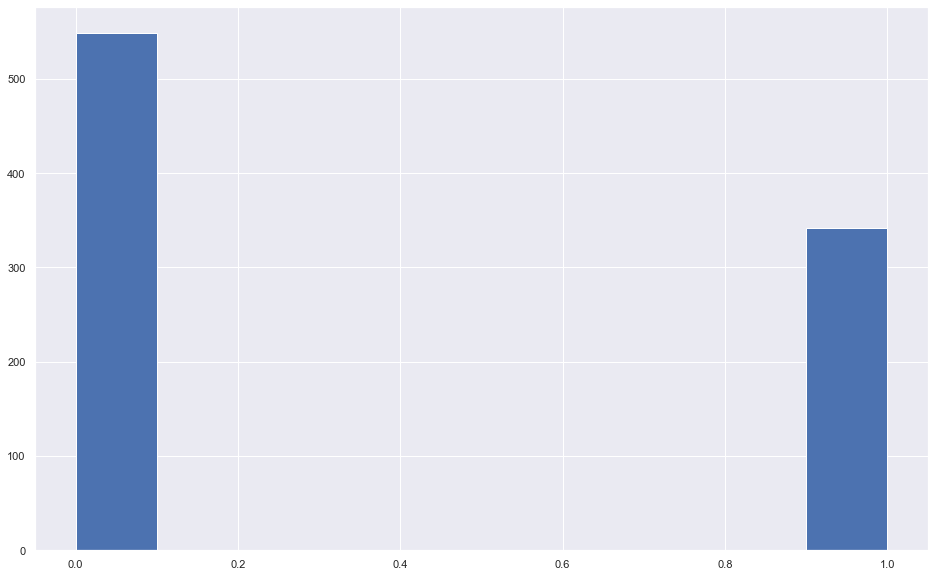

In [45]:
print(train_data['Survived'].value_counts(normalize=True))
train_data['Survived'].hist()

### Training the model 
There are couple of steps involved in building the model:

1. **Split the data into training and testing.** 

2. **Balance our training data** 

3. **Tweak the hyperparameters of the model** 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import class_weight
from sklearn import metrics

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(596, 25)
(295, 25)
(596,)
(295,)


In [48]:
# Balancing the dataset using random oversampling 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train1, Y_train1 = ros.fit_sample(X_train, Y_train)

In [49]:
print(X_train1.shape)
print(Y_train1.shape)

(730, 25)
(730,)


In [50]:
np.unique(Y_train1, return_counts=True)

(array([0., 1.]), array([365, 365], dtype=int64))

In [51]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)
print(class_weights)

[0.81643836 1.29004329]


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass classes=[0. 1.], y=PassengerId
243    0.0
345    0.0
171    0.0
188    1.0
801    0.0
      ... 
836    1.0
193    1.0
630    0.0
560    1.0
685    0.0
Name: Survived, Length: 596, dtype: float64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [52]:
rf = RandomForestClassifier(n_estimators=1100, criterion='gini', max_depth=5,
                           min_samples_split=4, min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=-1, random_state=24, 
                            verbose=1, warm_start=False, class_weight={0: class_weights[0], 1: class_weights[1]})

In [53]:
rf.fit(X_train1, Y_train1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.0s finished


RandomForestClassifier(class_weight={0: 0.8164383561643835,
                                     1: 1.29004329004329},
                       max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, n_jobs=-1, oob_score=True,
                       random_state=24, verbose=1)

In [54]:
rf.n_features_

25

#### Output of the model

1. **Predict the test data and look at the predictive accuracy of the model:** 

2. **Variable Importance:** Look at which feature are most important in predicting the model. 

In [55]:
y_pred_proba = rf.predict_proba(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished


In [56]:
print(y_pred_proba[:,1])
print(y_pred_proba.shape)

[0.4227187  0.20789903 0.26622583 0.99256514 0.79300452 0.47168673
 0.96487711 0.9507723  0.74048641 0.81699929 0.20964404 0.90982683
 0.18924719 0.94982938 0.96383763 0.68020787 0.23075331 0.35689677
 0.25633738 0.65945378 0.26331441 0.92770889 0.18924719 0.36491477
 0.68993236 0.98890223 0.24682368 0.70169608 0.94218796 0.50874665
 0.37829648 0.87781455 0.27087185 0.45047519 0.22558158 0.60386074
 0.23098444 0.24635377 0.22422433 0.33524389 0.65215255 0.34895495
 0.22828735 0.23824308 0.95106988 0.20962917 0.20962917 0.98708904
 0.23810137 0.60980586 0.51081287 0.69958694 0.94278552 0.21344125
 0.51076593 0.27091313 0.48237332 0.50874665 0.27876389 0.2366383
 0.39782642 0.5939109  0.98733157 0.40752551 0.65968637 0.21717432
 0.95488883 0.470769   0.94982938 0.9673583  0.94218796 0.53788807
 0.48364239 0.23332583 0.23332583 0.93746743 0.59375346 0.46070126
 0.25336516 0.37295077 0.23406824 0.59435189 0.94273133 0.25973298
 0.24858344 0.97613683 0.94773751 0.64146628 0.90025336 0.75058

<b> Evaluation of the model </b>

In [58]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba[:,1])
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_proba[:,1])
roc_auc_score = roc_auc_score(Y_test, y_pred_proba[:,1])
average_precision = average_precision_score(Y_test, y_pred_proba[:,1])
print('The roc score of the model is {}.\n'.format(roc_auc_score))
print('The average precision of the model is {}.\n'.format(average_precision))

The roc score of the model is 0.877301214257736.

The average precision of the model is 0.8558145794573412.



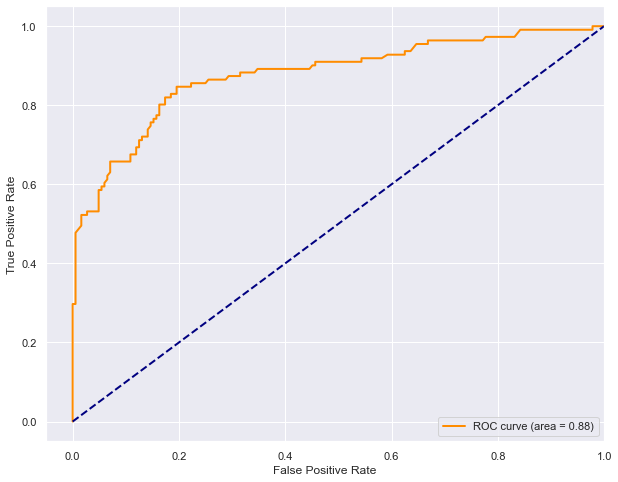

In [59]:
#plot the AUC/ROC curve for the model
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

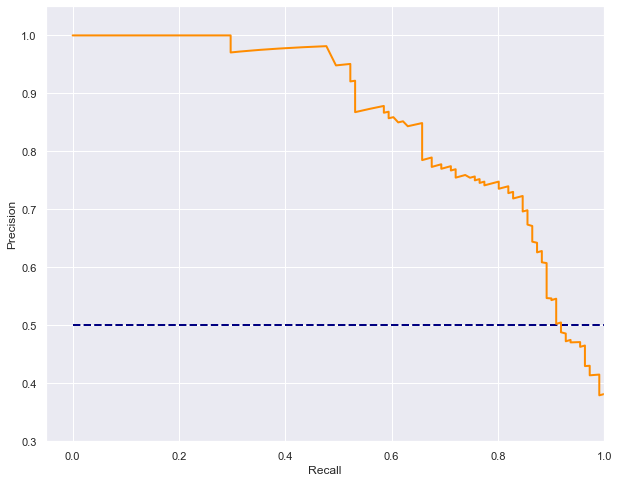

In [60]:
###plot a precision recall curve
plt.figure(figsize=(10,8))
plt.plot([0,1], [0.5, 0.5], linestyle="--", color='navy', lw=2)
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.3, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [61]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished


In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(Y_test, y_pred), "\n")
print("The accuracy score is: {}.\n".format(accuracy_score(Y_test, y_pred)))
print(classification_report(Y_test, y_pred))

[[143  41]
 [ 17  94]] 

The accuracy score is: 0.8033898305084746.

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83       184
         1.0       0.70      0.85      0.76       111

    accuracy                           0.80       295
   macro avg       0.80      0.81      0.80       295
weighted avg       0.82      0.80      0.81       295



In [63]:
prediction = rf.predict(test_df)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished


In [64]:
prediction

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [65]:
result_df = pd.DataFrame(columns=['PassengerId', 'Survived'])

In [67]:
result_df['PassengerId'] = test_df.index.values
result_df['Survived'] = prediction

In [68]:
result_df.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [69]:
inputDir = r'C:\Users\priya\Python Projects\Titanic Kaggle'
fileName = r'\Submission2.csv'

result_df.to_csv(inputDir+fileName, index=False)